### EDA and ML Pipeline

### Import 

In [1]:
import os
import pandas as pd
import seaborn as sns
os.getcwd()

'/'

In [4]:
""""
import subprocess
from pathlib import Path
import pandas as pd

try:
    repo_root = subprocess.run(
        ["git", "rev-parse", "--show-toplevel"],
        capture_output=True,
        text=True,
        check=True
    ).stdout.strip()
except subprocess.CalledProcessError:
    repo_root = Path.cwd()  # fallback if not in a git repo

csv_path = Path(repo_root) / "FullSimDF.csv"
dog_dat = pd.read_csv(csv_path)

"""

'"\nimport subprocess\nfrom pathlib import Path\nimport pandas as pd\n\ntry:\n    repo_root = subprocess.run(\n        ["git", "rev-parse", "--show-toplevel"],\n        capture_output=True,\n        text=True,\n        check=True\n    ).stdout.strip()\nexcept subprocess.CalledProcessError:\n    repo_root = Path.cwd()  # fallback if not in a git repo\n\ncsv_path = Path(repo_root) / "FullSimDF.csv"\ndog_dat = pd.read_csv(csv_path)\n\n'

In [2]:
dog_dat = pd.read_csv("/Users/ellawileman/Documents/fall2025/VIPR/CoolDawgs_PersonalizationGrp/FullSimDF.csv")
dog_dat.head()

,Breed,Age,Weight,Gender,Color,Coat Length,Coat Type,is_brachycephalic,Energy Level,Playfulness Level,...,Hum_Diff,CBT_simulated,is_old,is_overweight,heat_stress_risk,High_humidity_fordogs,prior_heat_related_injury_est,simulated_heat_injury_flag,target2Category,target3Category
0,Yorkshire Terrier,9.6,25.3,Male,Tricolor,Long,Silky,0.0,3.543823,1.930809,...,12.99,40.511511,0,0,0,1,0.002,0,1,Heat Stress
1,Poodle,4.3,43.6,Female,Gray,Long,Curly,0.0,2.856352,1.334560,...,11.75,38.406988,0,1,1,1,0.052,0,0,Normal
2,French Bulldog,3.5,33.3,Male,Cream,Short,Smooth,1.0,3.588762,4.748225,...,2.55,39.389887,0,0,1,0,0.052,0,0,Normal
3,Pembroke Welsh Corgi,6.4,49.6,Female,Cream,Short,Double,0.0,3.507116,4.176902,...,3.26,38.831824,0,1,1,0,0.052,0,0,Normal
4,Weimaraner,3.0,59.7,Male,Brown,Short,Smooth,0.0,3.832747,3.935919,...,3.96,39.439888,0,1,1,0,0.052,0,0,Normal


In [6]:
# column names
dog_dat.columns

Index(['Breed', 'Age', 'Weight', 'Gender', 'Color', 'Coat Length', 'Coat Type',
       'Energy Level', 'Playfulness Level', 'is_brachycephalic',
       'size_category', 'Spayed/Neutered', 'Indoor/Outdoor', 'Season',
       'Sun Exposure', 'Wind Cooling Effect', 'Station_Temp',
       'Station_Humidity', 'Ambient_Temp', 'Ambient_Humidity', 'T_device',
       'H_device', 'breed_wt_mu', 'breed_wt_sd', 'ideal_weight',
       'pct_of_ideal', 'BCS_cont', 'BCS', 'Temp_Diff', 'Hum_Diff',
       'CBT_simulated', 'is_old', 'is_overweight', 'heat_stress_risk',
       'High_humidity_fordogs', 'prior_heat_related_injury_est',
       'simulated_heat_injury_flag', 'target2Category', 'target3Category'],
      dtype='object')

## EDA

In [7]:
import matplotlib.pyplot as plt

### Univariate

(array([2.000e+00, 8.000e+00, 1.200e+01, 4.700e+01, 1.270e+02, 2.370e+02,
        4.750e+02, 7.730e+02, 1.187e+03, 1.319e+03, 1.356e+03, 1.328e+03,
        9.540e+02, 7.580e+02, 3.890e+02, 2.240e+02, 8.400e+01, 3.900e+01,
        1.500e+01, 1.000e+00]),
 array([-8.6  , -7.055, -5.51 , -3.965, -2.42 , -0.875,  0.67 ,  2.215,
         3.76 ,  5.305,  6.85 ,  8.395,  9.94 , 11.485, 13.03 , 14.575,
        16.12 , 17.665, 19.21 , 20.755, 22.3  ]),
 <BarContainer object of 20 artists>)

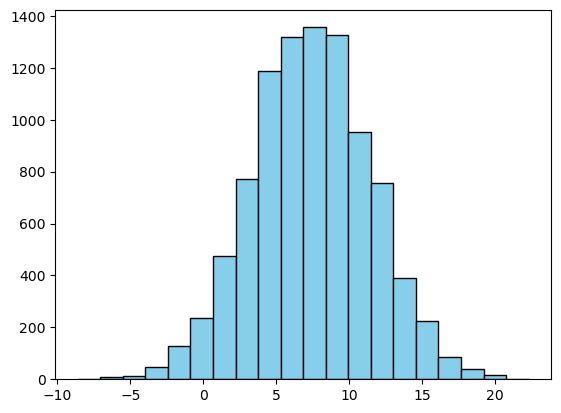

In [8]:
# Ella
plt.hist(dog_dat['Age'], bins=20, color='skyblue', edgecolor='black')
# Age is normally distributed about 7 years

### Bivariate

/var/folders/lh/72syyt1s53l562r2z_lbxw3w0000gn/T/ipykernel_42587/2035708879.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=cats, patch_artist=True)


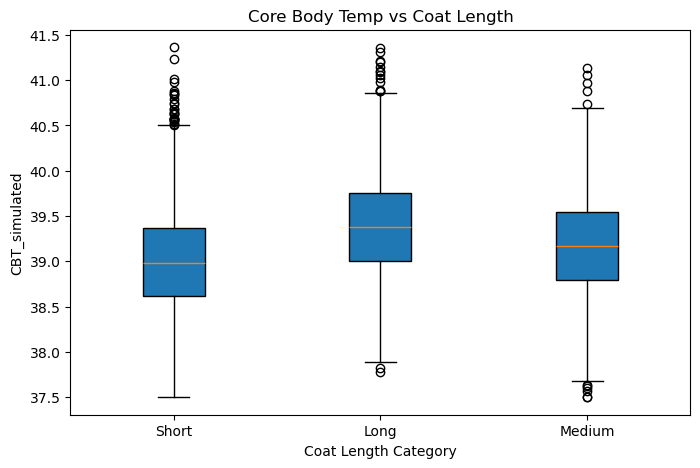

In [9]:
# Ella
cats = dog_dat['Coat Length'].unique()

# Create a list of CBT_simulated arrays, one per coat length category
data = [dog_dat.loc[dog_dat['Coat Length'] == c, 'CBT_simulated'] for c in cats]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=cats, patch_artist=True)
plt.ylabel("CBT_simulated")
plt.xlabel("Coat Length Category")
plt.title("Core Body Temp vs Coat Length")
plt.show()# No clear correlation between coat length and CBT, looks like short and medium tend to have slightly lower 
# minimums of CBT but not by much

### Model-Agnostic Feature Selection

In [10]:
# Correlation Filtering? 

## Predicting CBT and "Heat Stress" Label

In [11]:
dog_dat['target3Category'].value_counts()

target3Category
Normal         8151
Heat Stress    1126
Heat Stroke      58
Name: count, dtype: int64

In [3]:
# Drop the target columns from X, and core body temp
X = dog_dat.drop(columns=['target2Category', 'target3Category', 'CBT_simulated'])
# Assume X is your feature set without targets
numeric_features = X.select_dtypes(include=['int64', 'float64'])
categorical_features = X.select_dtypes(include=['object', 'category'])
# One-hot encode categorical features
X_cat_encoded = pd.get_dummies(categorical_features, drop_first=True)
X_encoded = pd.concat([numeric_features, X_cat_encoded], axis=1)




# Binary target
y2 = dog_dat['target2Category']
label_map_binary = {"Normal": 0, "Heat Stress": 1}
y2_num = y2.map(label_map_binary)

# 3-class target
y3 = dog_dat['target3Category']
ordered_levels = ["Normal", "Heat Stress", "Heat Stroke"]
y3_cat = pd.Categorical(y3, categories=ordered_levels, ordered=True)
label_map_3class = {"Normal": 0, "Heat Stress": 1, "Heat Stroke": 2}
y3_num = y3.map(label_map_3class)

y_cbt = dog_dat['CBT_simulated']


#### Train test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(
    X_encoded, y2, test_size=0.2, random_state=42, stratify=y2
) # split samples once

y_train_2class = y2.loc[X_train.index]
y_test_2class = y2.loc[X_test.index]

y_train_3class = y3_num.loc[X_train.index]
y_test_3class = y3_num.loc[X_test.index]

y_train_continuous = y_cbt.loc[X_train.index]
y_test_continuous = y_cbt.loc[X_test.index]

### Testing Regression Models 

In [6]:
#reused smote data 
from imblearn.over_sampling import SMOTE
import numpy as np
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X_train, y_train_2class)


In [15]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X2_train_res)
X_test_scaled = scaler.transform(X_test)

#### 2-Class Linear Regression

In [16]:
# Sydney

#linear with 2 class


linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train_scaled, y2_train_res)
linearPredictions = linearRegressionModel.predict(X_test_scaled)
#threshold since this isnt a classifier and prediction is 0 or 1
binary_preds = [1 if x >= 0.3 else 0 for x in linearPredictions]
print(classification_report(y_test_2class, binary_preds))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1630
           1       0.54      0.44      0.48       237

    accuracy                           0.88      1867
   macro avg       0.73      0.69      0.71      1867
weighted avg       0.87      0.88      0.88      1867



Top 10 Features for Linear Regression (by Absolute Coefficient):
Breed_Doberman Pinscher    0.179512
Breed_Border Collie        0.157020
Coat Type_Wiry             0.154583
Breed_Rottweiler           0.151645
Breed_Pekingese            0.143641
Sun Exposure               0.143235
Breed_Shetland Sheepdog    0.137013
Breed_Poodle               0.129782
Breed_Cocker Spaniel       0.125823
Breed_Samoyed              0.118168
dtype: float64


/var/folders/lh/72syyt1s53l562r2z_lbxw3w0000gn/T/ipykernel_42587/444453961.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_linear.values, y=top_10_linear.index, palette='coolwarm')


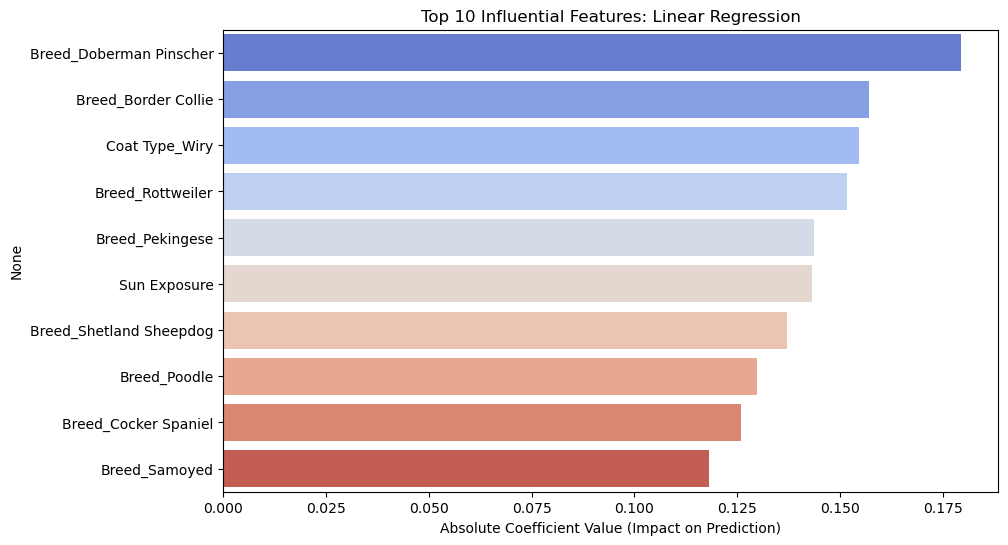

In [64]:

coefficients = linearRegressionModel.coef_

coef_df = pd.Series(coefficients, index=X2_train_res.columns)

top_10_linear = coef_df.abs().sort_values(ascending=False).head(10)


print("Top 10 Features for Linear Regression (by Absolute Coefficient):")
print(top_10_linear)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_linear.values, y=top_10_linear.index, palette='coolwarm')
plt.title('Top 10 Influential Features: Linear Regression')
plt.xlabel('Absolute Coefficient Value (Impact on Prediction)')
plt.show()

#### 2-Class Gradient Boosting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Fit  SMOTE-balanced training data
gb_reg.fit(X_train_scaled, y2_train_res)

#  continuous risk scores
gb_raw = gb_reg.predict(X_test_scaled)

# apply threshold
gb_preds = np.where(gb_raw >= 0.3, 1, 0)

print(classification_report(y_test_2class, gb_preds))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1630
           1       0.33      0.63      0.43       237

    accuracy                           0.79      1867
   macro avg       0.63      0.72      0.65      1867
weighted avg       0.86      0.79      0.82      1867



Top 10 Features for Gradient Boosting:
Season_Summer        0.295754
Playfulness Level    0.127317
T_device             0.114220
Energy Level         0.079068
Temp_Diff            0.060201
Coat Type_Double     0.048468
Season_Spring        0.029661
is_brachycephalic    0.027513
Ambient_Temp         0.024253
Gender_Male          0.017034
dtype: float64


/var/folders/lh/72syyt1s53l562r2z_lbxw3w0000gn/T/ipykernel_42587/2744750057.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_gb.values, y=top_10_gb.index, palette='magma')


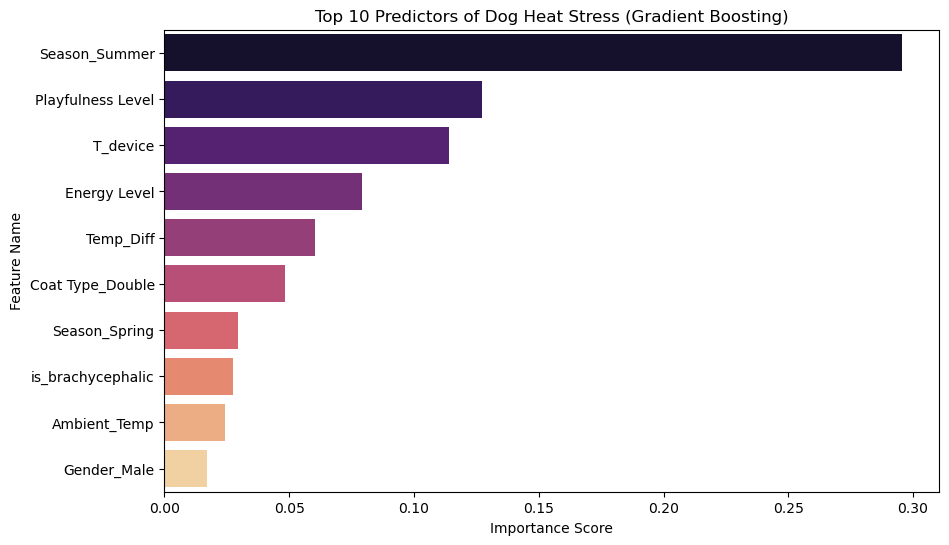

In [57]:
# map the importance scores to the original feature names
feature_importance = pd.Series(gb_reg.feature_importances_, index=X2_train_res.columns)

# sort them and take the top 10
top_10_gb = feature_importance.sort_values(ascending=False).head(10)

# print the list
print("Top 10 Features for Gradient Boosting:")
print(top_10_gb)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_gb.values, y=top_10_gb.index, palette='magma')
plt.title('Top 10 Predictors of Dog Heat Stress (Gradient Boosting)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

#### 2-Class Elastic Net Regressor

In [18]:
from sklearn.linear_model import ElasticNet

#smaller alpha as a penalty
en_model = ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42)
en_model.fit(X_train_scaled, y2_train_res)

#predictions without any classifying
en_raw = en_model.predict(X_test_scaled)

#apply the threshold to get 0s and 1s
en_preds = np.where(en_raw >= 0.25, 1, 0)

#report
print(classification_report(y_test_2class, en_preds))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1630
           1       0.40      0.61      0.48       237

    accuracy                           0.84      1867
   macro avg       0.67      0.74      0.69      1867
weighted avg       0.87      0.84      0.85      1867



Top 10 Features for Elastic Net:
Breed_Doberman Pinscher    0.163523
Coat Type_Wiry             0.144153
Breed_Border Collie        0.144143
Breed_Pekingese            0.139549
Breed_Rottweiler           0.137043
Breed_Shetland Sheepdog    0.130061
Breed_Poodle               0.127155
Breed_Cocker Spaniel       0.122839
Breed_Samoyed              0.112355
Breed_Pomeranian           0.110855
dtype: float64


/var/folders/lh/72syyt1s53l562r2z_lbxw3w0000gn/T/ipykernel_42587/2048115243.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_en.values, y=top_10_en.index, palette='plasma')


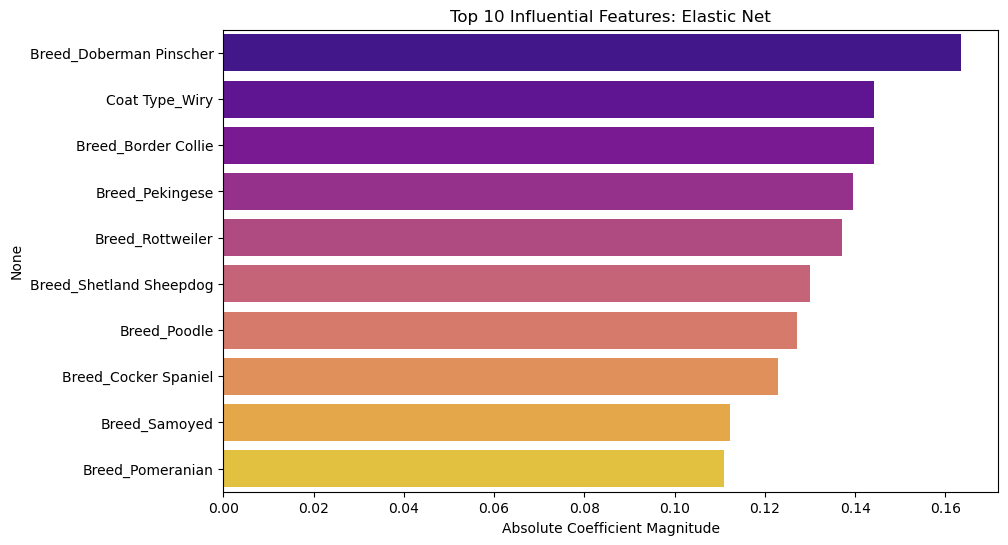

In [65]:
en_coef_series = pd.Series(en_model.coef_, index=X2_train_res.columns)
top_10_en = en_coef_series.abs().sort_values(ascending=False).head(10)

# 2. Print the list
print("Top 10 Features for Elastic Net:")
print(top_10_en)

# 3. Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_en.values, y=top_10_en.index, palette='plasma')
plt.title('Top 10 Influential Features: Elastic Net')
plt.xlabel('Absolute Coefficient Magnitude')
plt.show()

#### 2-Class Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_reg.fit(X_train_scaled, y2_train_res)

# get continuous predictions
dt_raw = dt_reg.predict(X_test_scaled)

# lower threshold to improve recall
dt_preds = np.where(dt_raw >= 0.3, 1, 0)
print(classification_report(y_test_2class, dt_preds))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1630
           1       0.30      0.65      0.41       237

    accuracy                           0.76      1867
   macro avg       0.62      0.72      0.63      1867
weighted avg       0.86      0.76      0.80      1867



Top 10 Features for Decision Tree:
Season_Summer        0.426162
T_device             0.128972
Temp_Diff            0.079503
Coat Type_Double     0.069644
Playfulness Level    0.047727
Coat Type_Silky      0.040381
Coat Type_Smooth     0.039909
Energy Level         0.032211
Season_Spring        0.031713
is_brachycephalic    0.024992
dtype: float64


/var/folders/lh/72syyt1s53l562r2z_lbxw3w0000gn/T/ipykernel_42587/2781828170.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dt_reg .values, y=top_10_dt_reg.index, palette='magma')


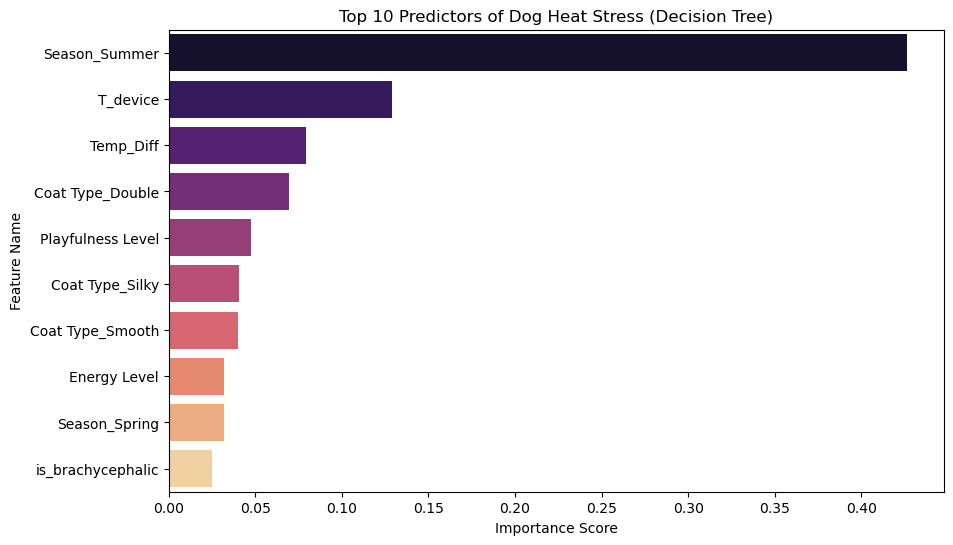

In [66]:
# map the importance scores to the original feature names
feature_importancedt_reg  = pd.Series(dt_reg.feature_importances_, index=X2_train_res.columns)

# sort them and take the top 10
top_10_dt_reg  = feature_importancedt_reg .sort_values(ascending=False).head(10)

# print the list
print("Top 10 Features for Decision Tree:")
print(top_10_dt_reg )
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_dt_reg .values, y=top_10_dt_reg.index, palette='magma')
plt.title('Top 10 Predictors of Dog Heat Stress (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

#### 2-Class MLP Regressor (Neural Network)

In [20]:
from sklearn.neural_network import MLPRegressor

# hidden_layer_sizes=(100, 50) means two layers of neurons
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                       activation='relu',  
                       random_state=42)

# fit model
mlp_reg.fit(X_train_scaled, y2_train_res)

# raw predictions (continuous values)
mlp_raw = mlp_reg.predict(X_test_scaled)

# thresholding logic we discussed - using 0.3 here to help boost Class 1 Recall
mlp_preds = np.where(mlp_raw >= 0.3, 1, 0)
print(classification_report(y_test_2class, mlp_preds))

              precision    recall  f1-score   support

           0       0.92      0.81      0.87      1630
           1       0.30      0.54      0.39       237

    accuracy                           0.78      1867
   macro avg       0.61      0.68      0.63      1867
weighted avg       0.85      0.78      0.81      1867



                     feature  importance
91          Coat Type_Double    0.224057
95            Coat Type_Wiry    0.145445
61              Breed_Poodle    0.138034
44      Breed_Cocker Spaniel    0.114938
46   Breed_Doberman Pinscher    0.112565
63          Breed_Rottweiler    0.101571
66   Breed_Shetland Sheepdog    0.095898
102            Season_Summer    0.090602
35       Breed_Border Collie    0.087416
58           Breed_Pekingese    0.086707


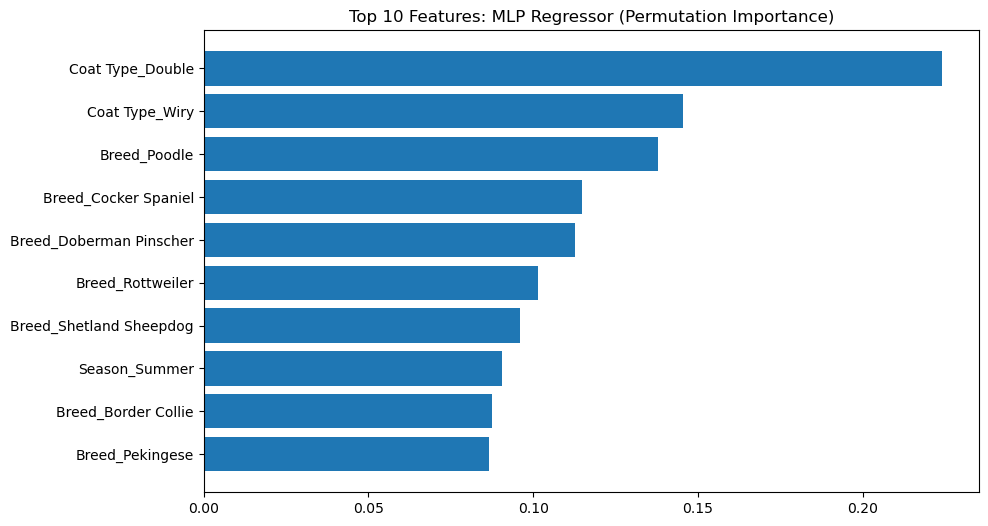

In [61]:

from sklearn.inspection import permutation_importance

# n_repeats=10 means it shuffles each column 10 times to get an average
results = permutation_importance(mlp_reg, X_test_scaled, y_test_2class, 
                                 n_repeats=10, random_state=42)

# 2. Map the results back to your feature names
importance_df = pd.DataFrame({
    'feature': X2_train_res.columns,
    'importance': results.importances_mean
}).sort_values(by='importance', ascending=False)

# 3. Print Top 10
print(importance_df.head(10))

# 4. Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'].head(10), importance_df['importance'].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Features: MLP Regressor (Permutation Importance)")
plt.show()

#### 2-Class Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=300, max_depth=6, random_state=42)

#fit data
rf_reg.fit(X_train_scaled, y2_train_res)

# untouched raw data from model
rf_raw = rf_reg.predict(X_test_scaled)

# apply the threshold - 0.3 to classify more Class 1 (Heat Stress) cases
rf_preds = np.where(rf_raw >= 0.3, 1, 0)

print(classification_report(y_test_2class, rf_preds))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1630
           1       0.31      0.72      0.44       237

    accuracy                           0.76      1867
   macro avg       0.63      0.75      0.64      1867
weighted avg       0.87      0.76      0.80      1867



Top 10 Features for Random Forest:
Season_Summer        0.417730
T_device             0.123841
Temp_Diff            0.094187
is_brachycephalic    0.047874
Coat Type_Double     0.044604
Playfulness Level    0.043538
Season_Spring        0.036393
Coat Type_Smooth     0.028786
Coat Type_Silky      0.026995
Energy Level         0.026354
dtype: float64


/var/folders/lh/72syyt1s53l562r2z_lbxw3w0000gn/T/ipykernel_42587/1533128580.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_rf.values, y=top_10_rf.index, palette='magma')


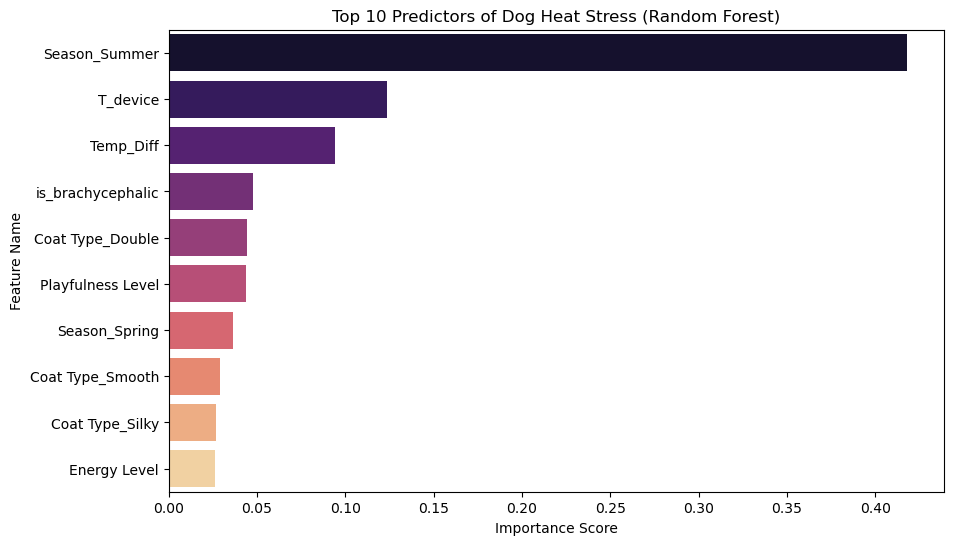

In [63]:
# map the importance scores to the original feature names
feature_importancerf = pd.Series(rf_reg.feature_importances_, index=X2_train_res.columns)

# sort them and take the top 10
top_10_rf = feature_importancerf.sort_values(ascending=False).head(10)

# print the list
print("Top 10 Features for Random Forest:")
print(top_10_rf)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_rf.values, y=top_10_rf.index, palette='magma')
plt.title('Top 10 Predictors of Dog Heat Stress (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

#### 2-Class Support Vector Regression

In [22]:
from sklearn.svm import SVR

#SVR with RBF kernel (non-linear relationships)
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# fit and predicitions collected
svr_reg.fit(X_train_scaled, y2_train_res)
svr_raw = svr_reg.predict(X_test_scaled)

# threshold (0.3 is a good starting point for safety)
svr_preds = np.where(svr_raw >= 0.3, 1, 0)

print(classification_report(y_test_2class, svr_preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1630
           1       0.46      0.39      0.42       237

    accuracy                           0.86      1867
   macro avg       0.69      0.66      0.67      1867
weighted avg       0.86      0.86      0.86      1867



### 3-Class Random Forest Regression

In [23]:
#3 class

# reused SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42, sampling_strategy='not majority' )
X3_train_res, y3_train_res = smote3.fit_resample(X_train, y_train_3class)

X_train3_scaled = scaler.fit_transform(X3_train_res)
X_test3_scaled = scaler.transform(X_test)

#Random Forest Regression model
rf_3class = RandomForestRegressor(n_estimators=300, max_depth=6, random_state=42)
rf_3class.fit(X_train3_scaled, y3_train_res) # Use your 3-class resampled labels

#  continuous predictions collected
rf_raw = rf_3class.predict(X_test3_scaled)

#  Double Threshold Logic -  < 0.3 is Normal, 0.3 to 1.5 is Stress, > 1.5 is Stroke
conditions = [
    (rf_raw < 0.3),
    (rf_raw >= 0.3) & (rf_raw < 1.5),
    (rf_raw >= 1.5)
]
choices = [0, 1, 2]
rf_preds_3class = np.select(conditions, choices)

print(classification_report(y_test_3class, rf_preds_3class))

              precision    recall  f1-score   support

           0       0.96      0.65      0.78      1630
           1       0.22      0.71      0.34       225
           2       0.12      0.42      0.19        12

    accuracy                           0.66      1867
   macro avg       0.43      0.59      0.43      1867
weighted avg       0.86      0.66      0.72      1867



Top 10 Features for Random Forest:
T_device                  0.571360
Season_Summer             0.105684
Coat Type_Double          0.086355
Energy Level              0.028636
Temp_Diff                 0.027703
Coat Length_Medium        0.020621
Breed_Alaskan Malamute    0.020612
H_device                  0.019542
Weight                    0.013186
Breed_Border Collie       0.012192
dtype: float64


/var/folders/lh/72syyt1s53l562r2z_lbxw3w0000gn/T/ipykernel_42587/785864727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_rf.values, y=top_10_rf.index, palette='magma')


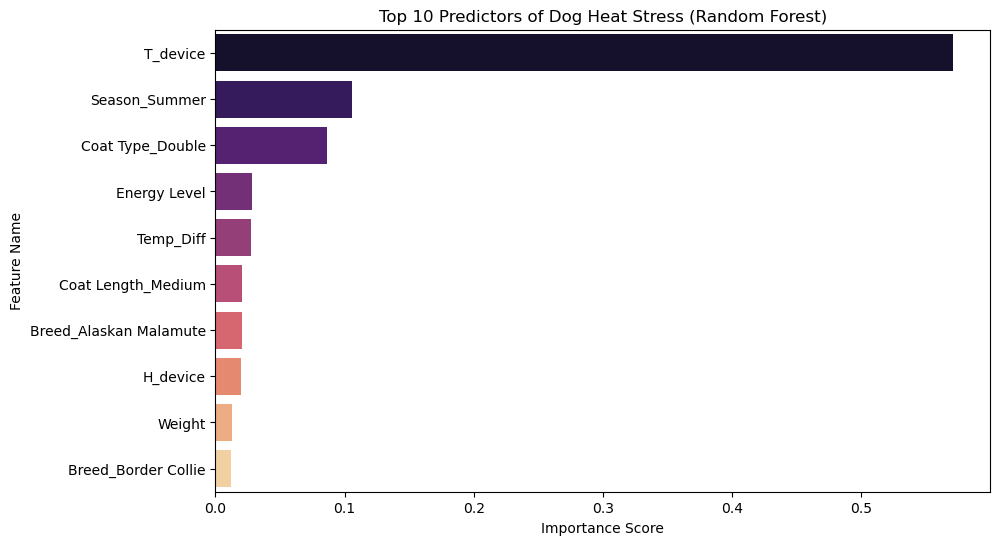

In [70]:
# map the importance scores to the original feature names
feature_importancerf = pd.Series(rf_3class.feature_importances_, index=X3_train_res.columns)

# sort them and take the top 10
top_10_rf = feature_importancerf.sort_values(ascending=False).head(10)

# print the list
print("Top 10 Features for Random Forest:")
print(top_10_rf)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_rf.values, y=top_10_rf.index, palette='magma')
plt.title('Top 10 Predictors of Dog Heat Stress (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

### Using Binary Target Class (2-class)

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X2_train_res, y2_train_res = smote.fit_resample(X_train, y_train_2class)
print("Original class distribution:\n", y_train_2class.value_counts())
print("After SMOTE:\n", y2_train_res.value_counts())

Original class distribution:
 target2Category
0    6521
1     947
Name: count, dtype: int64
After SMOTE:
 target2Category
0    6521
1    6521
Name: count, dtype: int64


### Using Three Class Target 

In [25]:
# SMOTE with 3 classes (training only)
smote3 = SMOTE(random_state=42, sampling_strategy='not majority' )
X3_train_res, y3_train_res = smote3.fit_resample(X_train, y_train_3class)
print("Original class distribution:\n", y_train_3class.value_counts())
print("After SMOTE:\n", y3_train_res.value_counts())

Original class distribution:
 target3Category
0    6521
1     901
2      46
Name: count, dtype: int64
After SMOTE:
 target3Category
0    6521
1    6521
2    6521
Name: count, dtype: int64


In [26]:
y_test_3class.value_counts()

target3Category
0    1630
1     225
2      12
Name: count, dtype: int64

Now we are ready to fit ML models below (Use 2-class training and testing or 3-class training and testing) 
-  If you want to use a BINARY CLASSIFIER MODEL: X2_train_res, X2_test, y2_train_res, y2_test
- If you want to use a MULTI-CLASS CLASSIFIER MODEL: X3_train_res, X3_test, y3_train_res, y3_test

**Basic Steps**
- 1. Fit model on training
- 2. Predict on testing
- 4. Choose most important features (above a threshold) for new subset of features
- 5. Retrain on only that subset
- 6. Grid search (not implemented yet) - for best combo of predictors
- 7. Predict on testing
- 8. Show classification report


In [8]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

### 2-Class Target Classifiers

#### 2-Class XGBoost

In [11]:
# Ella

# XGBOOST for 2-class target
from xgboost import XGBClassifier

num_pos = sum(y2_train_res == 1)
num_neg = sum(y2_train_res == 0)

# fit prelim model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42, 
    scale_pos_weight=(num_neg / num_pos)  # weight positives more ( prioritize recall)
)

xgb_model.fit(X2_train_res, y2_train_res)
y2_pred = xgb_model.predict(X_test)
# predict probabilities
y2_proba = xgb_model.predict_proba(X_test)

# step 4: permutation importance
# permutation importance works on any model type
# can apply same process to all classifiers

perm_importance = permutation_importance(xgb_model, X_test, y_test_2class, n_repeats=10, random_state=42, scoring = "recall")

# get permutation importance as dataframe
perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance:")
print(perm_df.head(30))

Top 20 features by permutation importance:
                     feature  importance_mean  importance_std
12                  T_device         0.146262        0.005929
10              Ambient_Temp         0.117290        0.006756
20                 Temp_Diff         0.091589        0.008147
102            Season_Summer         0.075234        0.019543
21                  Hum_Diff         0.031308        0.006625
77                Color_Blue         0.012150        0.005204
11          Ambient_Humidity         0.011215        0.006339
74               Color_Black         0.009813        0.007071
16              ideal_weight         0.009346        0.006608
7        Wind Cooling Effect         0.006075        0.005549
87            Color_Tricolor         0.005607        0.004074
84               Color_Sable         0.005607        0.007477
3               Energy Level         0.004673        0.009109
43    Breed_Chinese Shar-Pei         0.004206        0.001402
49    Breed_Golden Retrieve

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'T_device'),
  Text(1, 0, 'Ambient_Temp'),
  Text(2, 0, 'Temp_Diff'),
  Text(3, 0, 'Season_Summer'),
  Text(4, 0, 'Hum_Diff'),
  Text(5, 0, 'Station_Temp'),
  Text(6, 0, 'Age'),
  Text(7, 0, 'is_brachycephalic'),
  Text(8, 0, 'H_device'),
  Text(9, 0, 'Color_Merle'),
  Text(10, 0, 'Weight'),
  Text(11, 0, 'Breed_Alaskan Malamute'),
  Text(12, 0, 'Coat Length_Medium'),
  Text(13, 0, 'BCS_cont'),
  Text(14, 0, 'pct_of_ideal'),
  Text(15, 0, 'Color_Tan'),
  Text(16, 0, 'Breed_Bulldog'),
  Text(17, 0, 'Breed_Lhasa Apso'),
  Text(18, 0, 'Breed_Poodle'),
  Text(19, 0, 'Color_Brindle')])

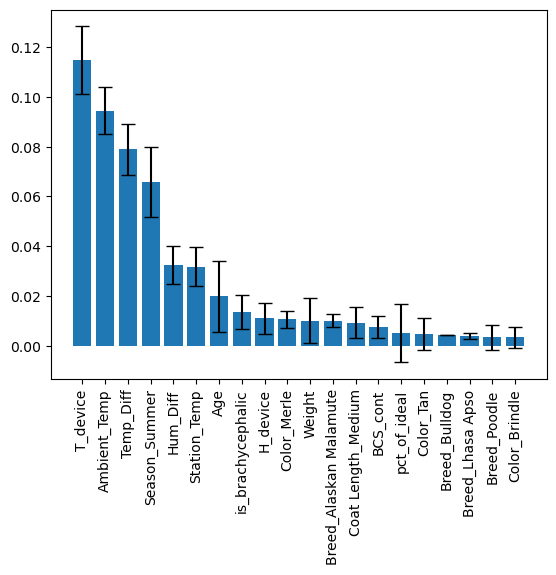

In [29]:
plt.bar(perm_df['feature'][:20], perm_df['importance_mean'][:20], yerr=perm_df['importance_std'][:20], capsize=5)
plt.xticks(rotation=90)

In [13]:
selected_features = perm_df[perm_df['importance_mean'] > 0]['feature'].tolist()
# could modify this to select features above some threshold instead

# Reduce training and test sets to selected features
X2_train_sel = X2_train_res[selected_features]
X2_test_sel = X_test[selected_features]

print(f"Number of features selected: {len(selected_features)}")

# Step 6: retrain on selected features

# ----------------------
# Add grid search here - optimize
# ----------------------

xgb_model_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(num_neg / num_pos)  # weight positives more ( prioritize recall)
    
)

# Fit model on selected features
xgb_model_sel.fit(X2_train_sel, y2_train_res)
y2_pred_sel = xgb_model_sel.predict(X2_test_sel)
y2_proba_sel = xgb_model_sel.predict_proba(X2_test_sel)

# classification report for evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report after feature selection:")
print(classification_report(y_test_2class, y2_pred_sel))
print("Confusion matrix:")
print(confusion_matrix(y_test_2class, y2_pred_sel))

Number of features selected: 27
Classification report after feature selection:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1660
           1       0.36      0.45      0.40       214

    accuracy                           0.84      1874
   macro avg       0.64      0.67      0.65      1874
weighted avg       0.86      0.84      0.85      1874

Confusion matrix:
[[1487  173]
 [ 118   96]]


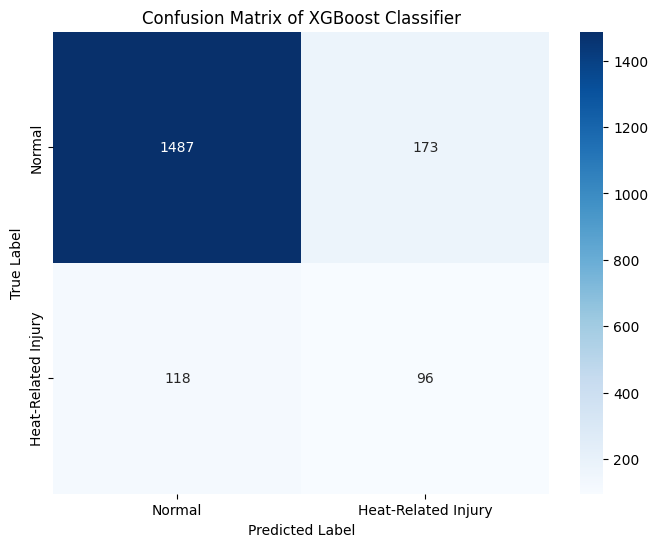

In [15]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_2class, y2_pred_sel)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Heat-Related Injury'], # Replace with your class labels
                yticklabels=['Normal', 'Heat-Related Injury']) # Replace with your class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()

#### 2-Class LogReg Classifier

In [32]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

'''
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X2_train_res, y2_train_res)


perm_importance = permutation_importance(logreg_model, X_test, y_test_2class, n_repeats=10, random_state=42, scoring = "recall")

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance:")
print(perm_df.head(20))
'''

# Not sure if computationally feasible to do permutation importance for logistic regression

'\nlogreg_model = LogisticRegression(max_iter=1000, random_state=42)\nlogreg_model.fit(X2_train_res, y2_train_res)\n\n\nperm_importance = permutation_importance(logreg_model, X_test, y_test_2class, n_repeats=10, random_state=42, scoring = "recall")\n\nperm_df = pd.DataFrame({\n    \'feature\': X_test.columns,\n    \'importance_mean\': perm_importance.importances_mean,\n    \'importance_std\': perm_importance.importances_std\n}).sort_values(by=\'importance_mean\', ascending=False)\n\nprint("Top 20 features by permutation importance:")\nprint(perm_df.head(20))\n'

#### 2-Class Support Vector Classifier

In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


lin_svm = LinearSVC(C=1, class_weight='balanced')

lin_svm.fit(X2_train_res, y2_train_res)

y_pred_linear = lin_svm.predict(X_test)
print(classification_report(y_test_2class, y_pred_linear))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1660
           1       0.66      0.23      0.34       214

    accuracy                           0.90      1874
   macro avg       0.78      0.61      0.64      1874
weighted avg       0.88      0.90      0.88      1874



In [17]:
from sklearn.svm import SVC

rbf_svm = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    class_weight='balanced',
    probability=True
)

rbf_svm.fit(X2_train_res, y2_train_res)

y_pred_rbf = rbf_svm.predict(X_test)

In [18]:
print(classification_report(y_test_2class, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1660
           1       0.35      0.43      0.39       214

    accuracy                           0.84      1874
   macro avg       0.64      0.66      0.65      1874
weighted avg       0.86      0.84      0.85      1874



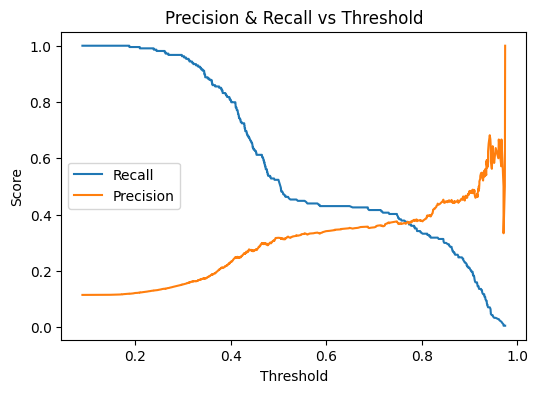

In [20]:
# Can we lower threshold to boost recall for Class 1?
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# y_proba is probability of class 1
y_proba = rbf_svm.predict_proba(X_test)[:,1]  # or any classifier with probabilities

precision, recall, thresholds = precision_recall_curve(y_test_2class, y_proba)

# Plot
plt.figure(figsize=(6,4))
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test_2class, y_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)

PR-AUC: 0.3471371591923042


In [ ]:

threshold = 0.25  # picked from plot as optimizing recall sufficiently
y_pred_recall = (y_proba >= threshold).astype(int)
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix

print("Recall:", recall_score(y_test_2class, y_pred_recall))
print("Precision:", precision_score(y_test_2class, y_pred_recall))
print(classification_report(y_test_2class, y_pred_recall))
print(confusion_matrix(y_test_2class, y_pred_recall))

# Accuracy dropped so badly so move onto next model that can better balance the two.

Recall: 0.9813084112149533
Precision: 0.13249211356466878
              precision    recall  f1-score   support

           0       0.99      0.17      0.29      1660
           1       0.13      0.98      0.23       214

    accuracy                           0.26      1874
   macro avg       0.56      0.58      0.26      1874
weighted avg       0.89      0.26      0.29      1874

[[ 285 1375]
 [   4  210]]


#### 2-Class RF Classifier

Recall: 0.3691588785046729
Precision: 0.48466257668711654
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1660
           1       0.48      0.37      0.42       214

    accuracy                           0.88      1874
   macro avg       0.70      0.66      0.68      1874
weighted avg       0.87      0.88      0.88      1874

[[1576   84]
 [ 135   79]]


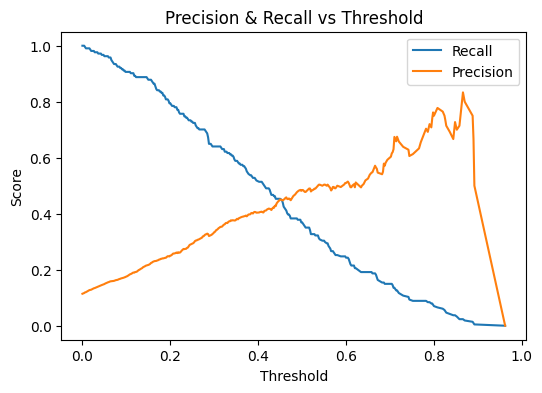

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt

# Initialize Random Forest with class balancing
rf = RandomForestClassifier(
    n_estimators=500,           # number of trees
    max_depth=None,             # let trees grow until all leaves are pure
    class_weight='balanced',    # automatically weight minority class higher
    random_state=42
)

# Fit on training data
rf.fit(X2_train_res, y2_train_res)

# Get predicted probabilities for class 1 specifically
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Optional: choose a threshold to optimize recall without sacrificing too much accuracy
threshold = 0.5  # start with default, then adjust
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# Evaluation
print("Recall:", recall_score(y_test_2class, y_pred_rf))
print("Precision:", precision_score(y_test_2class, y_pred_rf))
print(classification_report(y_test_2class, y_pred_rf))
print(confusion_matrix(y_test_2class, y_pred_rf))

# Plot Precision-Recall vs Threshold
precision, recall, thresholds = precision_recall_curve(y_test_2class, y_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.show()

In [28]:
# adjust thresh
threshold = 0.40
y_pred_rf = (y_proba_rf >= threshold).astype(int) 

print("Recall:", recall_score(y_test_2class, y_pred_rf))
print("Precision:", precision_score(y_test_2class, y_pred_rf))
print(classification_report(y_test_2class, y_pred_rf))
print(confusion_matrix(y_test_2class, y_pred_rf))


Recall: 0.514018691588785
Precision: 0.40441176470588236
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1660
           1       0.40      0.51      0.45       214

    accuracy                           0.86      1874
   macro avg       0.67      0.71      0.69      1874
weighted avg       0.87      0.86      0.87      1874

[[1498  162]
 [ 104  110]]


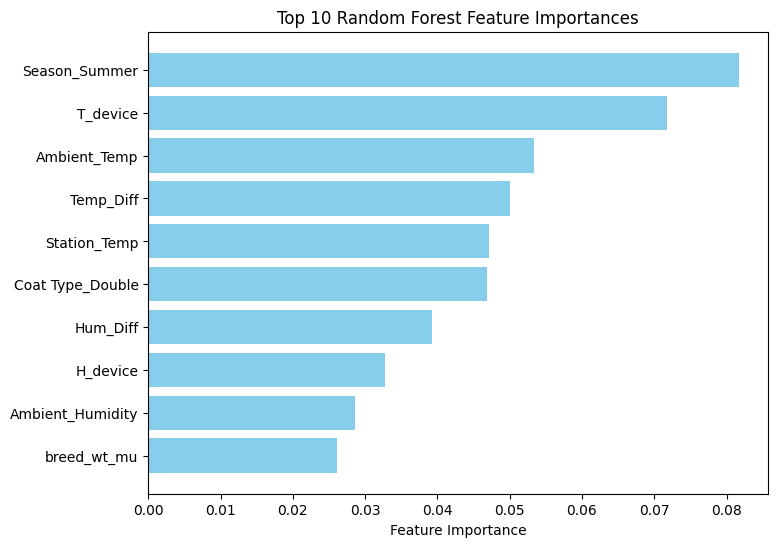

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns  # or list of feature names

# Create DataFrame and sort
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Keep only top 10
top10 = feat_imp_df.head(10)

# Plot
plt.figure(figsize=(8,6))
plt.barh(top10['feature'], top10['importance'], color='skyblue')
plt.gca().invert_yaxis()  # top feature on top
plt.xlabel('Feature Importance')
plt.title('Top 10 Random Forest Feature Importances')
plt.show()

### 3-Class Target Classifiers

#### 3-Class XGBoost

In [36]:
# Try on 3-class target
from xgboost import XGBClassifier

xgb_model_3 = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',   # IMPORTANT
    num_class=3,                  # IMPORTANT
    random_state=42
)
xgb_model_3.fit(X3_train_res, y3_train_res)
y3_pred = xgb_model_3.predict(X_test)

perm_importance_3 = permutation_importance(
    xgb_model_3, 
    X_test, 
    y_test_3class, 
    n_repeats=10, 
    random_state=42,
    scoring='accuracy'  # Can also use 'f1_weighted' for multi-class
)


In [37]:
perm_df_3 = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_importance_3.importances_mean,
    'importance_std': perm_importance_3.importances_std
}).sort_values(by='importance_mean', ascending=False)

print("Top 20 features by permutation importance (3-class):")
print(perm_df_3.head(20))

# Keep features with mean importance > 0
selected_features_3 = perm_df_3[perm_df_3['importance_mean'] > 0]['feature'].tolist()

# Reduce training and test sets to selected features
X3_train_sel = X3_train_res[selected_features_3]
X3_test_sel = X_test[selected_features_3]

print(f"Number of features selected (3-class): {len(selected_features_3)}")

### 
# ----------------------
# Add grid search here - optimize
# ----------------------

# Retrain on selected features
xgb_model_3_sel = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)
xgb_model_3_sel.fit(X3_train_sel, y3_train_res)
y3_pred_sel = xgb_model_3_sel.predict(X3_test_sel)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix (3-class):")
print(confusion_matrix(y_test_3class, y3_pred_sel))

Top 20 features by permutation importance (3-class):
                           feature  importance_mean  importance_std
102                  Season_Summer         0.045420        0.007371
101                  Season_Spring         0.028227        0.003405
91                Coat Type_Double         0.027531        0.002468
93                Coat Type_Smooth         0.016069        0.003223
89              Coat Length_Medium         0.013926        0.002088
90               Coat Length_Short         0.009855        0.002445
15                     breed_wt_sd         0.009695        0.002987
3                Playfulness Level         0.005838        0.001923
0                              Age         0.005624        0.001629
14                     breed_wt_mu         0.005624        0.002398
92                 Coat Type_Silky         0.004339        0.002025
2                     Energy Level         0.003910        0.001590
61                    Breed_Poodle         0.003803        0.00

In [38]:
print("Classification report after feature selection (3-class):")
print(classification_report(y_test_3class, y3_pred_sel))

Classification report after feature selection (3-class):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1630
           1       0.55      0.27      0.36       225
           2       0.33      0.17      0.22        12

    accuracy                           0.88      1867
   macro avg       0.60      0.47      0.51      1867
weighted avg       0.86      0.88      0.86      1867



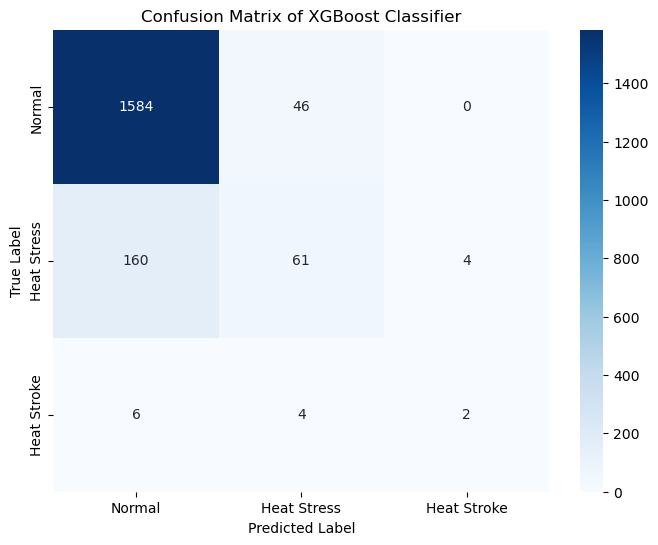

In [39]:
import seaborn as sns
cm = confusion_matrix(y_test_3class, y3_pred_sel)
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Heat Stress', 'Heat Stroke'], # Replace with your class labels
                yticklabels=['Normal', 'Heat Stress', 'Heat Stroke']) # Replace with your class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()


#### 3-Class SVM Classifier

In [40]:
# Support Vector Machine Classifier


In [41]:
# Comparing 3-class classifiers

In [42]:
# Comparing 2 vs 3 class classifiers

### Continuous CBT Regressors

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Scale features (need for mlp)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLP
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100, 100),
                       activation='relu',
                       max_iter=1000,
                       random_state=42,
                       early_stopping=True,
                       validation_fraction=0.1)

mlp_reg.fit(X_train_scaled, y_train_continuous)

# Predict
mlp_pred = mlp_reg.predict(X_test_scaled)

# Evaluate
r2 = r2_score(y_test_continuous, mlp_pred)
print("R2:", r2)

# MLP is a terrible fit for data, negative R2 indicates worse than just predicting mean


R2: -1.4355146936504952


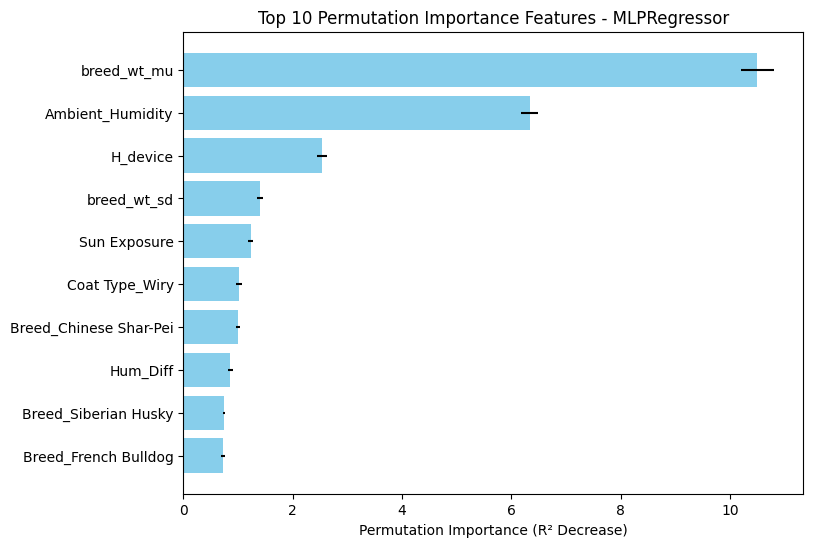

In [35]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Compute permutation importance
perm_result = permutation_importance(
    mlp_reg, X_test, y_test_continuous,  # regression target
    n_repeats=10,
    random_state=42,
    scoring='r2'  # regression metric
)

# Convert to DataFrame
perm_imp_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_result.importances_mean,
    'importance_std': perm_result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# Keep top 10
top10 = perm_imp_df.head(10)

# Plot
plt.figure(figsize=(8,6))
plt.barh(top10['feature'], top10['importance_mean'], xerr=top10['importance_std'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Permutation Importance (R^2 Decrease)')
plt.title('Top 10 Permutation Importance Features - MLPRegressor')
plt.show()

#### Random Forest Regressor

R² on test set: 0.35131480077844324


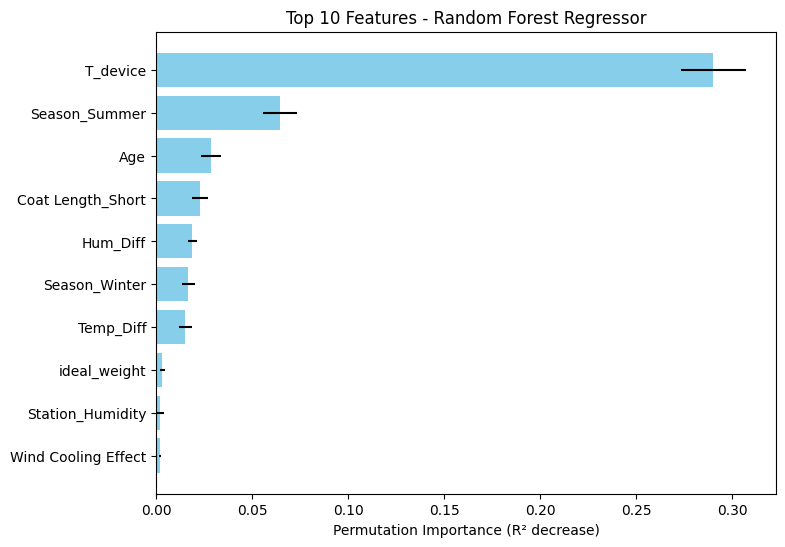

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

# rf
rf_reg = RandomForestRegressor(
    n_estimators=500,      # number of trees
    max_depth=None,        # let trees grow until all leaves are pure
    random_state=42,
    n_jobs=-1              # use all cores
)

rf_reg.fit(X_train, y_train_continuous)
y_pred_rf = rf_reg.predict(X_test)
r2 = r2_score(y_test_continuous, y_pred_rf)
print("R² on test set:", r2)

perm_result = permutation_importance(
    rf_reg, X_test, y_test_continuous,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

perm_imp_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance_mean': perm_result.importances_mean,
    'importance_std': perm_result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# top 10 features
top10 = perm_imp_df.head(10)
plt.figure(figsize=(8,6))
plt.barh(top10['feature'], top10['importance_mean'], xerr=top10['importance_std'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Permutation Importance (R2 decrease)')
plt.title('Top 10 Features - Random Forest Regressor')
plt.show()

# still not a great fit for data, better than MLP but captures less than half of variance
# may become a better fit after accounting for excercise 